##파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.3.5

     |████████████████████████████████| 11.3 MB 5.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
import pickle
import gzip

# 제공받은 csv의 랜덤한 10% 추출한 pickle file
with gzip.open(r'/content/drive/MyDrive/log-data/df_final_0.pickle','rb') as f:
     d = pickle.load(f)

In [ ]:
d.shape # 10,668,811 rows

(10668811, 6)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10668811 entries, 0 to 733057
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   inDate          object
 1   game_id         int64 
 2   gamer_id        object
 3   url             object
 4   method          object
 5   tableAndColumn  object
dtypes: int64(1), object(5)
memory usage: 569.8+ MB


### csv파일의 랜덤한 1% rows read 후, 피클화 진행

In [ ]:
# 랜덤한 10% 파일로 1228 ~ 0111 까지의 데이터 read_csv 후, 
chunks = pd.read_csv('/Volumes/Untitled/@ Code States/@final_data/1228_1b54a3a7-c744-4136-b000-5d2a2a3aede2.csv', skiprows=lambda x: x>0 and random.random() > 0.01, chunksize=100000)
d_1228 = pd.concat(chunks)
end = time.time()
print('Read csv with chunks: ',(end),'sec')

In [ ]:
d = pd.concat([d_1228, d_1229, d_1230, d_1231, d_0101, d_0102, d_0103, d_0104, d_0105, d_0106, d_0107, d_0108, d_0109, d_0110, d_0111], axis = 0)

In [ ]:
import pickle
import gzip

with gzip.open(r'/Users/woomin/Desktop/project2/data/df_final_0.pickle', 'wb') as f:
    pickle.dump(d, f)

## EDA  & 전처리

In [ ]:
d

,inDate,game_id,gamer_id,url,method,tableAndColumn
0,2021-12-28 09:34:39.350,2319,1842a54b4d74f020023d83ad87824dd9b69e5bb1a2506c...,/data/gameinfo/v3.1/union,PUT,"[{tablename=UserInfo, columns=[selectedSkillGr..."
1,2021-12-28 09:34:39.512,1913,7cfd1c0793478a3e4752e3ab0bb2950eafbd0404d8f279...,/data/gameinfo/v3.1/union,PUT,"[{tablename=Missiles, columns=[data]}]"
2,2021-12-28 09:34:39.811,1913,40880d8e47b5079e1ea52e68c34f3ab04bd847ee01af17...,/data/gameinfo/v3.1/union,PUT,"[{tablename=Resources, columns=[data]}]"
3,2021-12-28 09:34:40.826,953,f6d9de1b9d0334a23282783277ed40f15b55749b06558f...,/data/gameinfo/v3.1/union,PUT,"[{tablename=user_info, columns=[achievements, ..."
4,2021-12-28 09:34:41.120,2364,76d95503f3c123beeaf8262d37956224e043ed9c792751...,/data/gameLog/v1.1/InventoryInfo,POST,NaN
...,...,...,...,...,...,...
733053,2022-01-11 23:59:59.810,2326,ca55d14111ebec1318efd39d34e25fd321b9b927122b8b...,/data/probability/v1.2/10/2967,GET,NaN
733054,2022-01-11 23:59:59.858,2326,03b2da96658da1713f9ba699f2a3c60a5d07037d13fb1a...,/data/gameinfo/v3.3/union,PUT,NaN
733055,2022-01-11 23:59:59.908,1585,a32b9c858394b85dc98cafb4faed0dd7283accd6dafcdf...,/data/rank/union/v1.1/044caf10-df0f-11eb-9e66-...,POST,NaN
733056,2022-01-11 23:59:59.972,2326,4b111830addbbc17ec6a19eea37f4916eabd6330ccf230...,/data/gameinfo/v3.3/union,PUT,NaN


### Method - DELETE 에 대한 분석

In [ ]:
# delete가 매우 적은걸 확인, 라벨링에 따라서 달라지겠지만 유의미하거나 무의미한 정보가 될 수 있음
d.method.value_counts()

PUT       5144092
POST      2991117
GET       2529556
DELETE       4046
Name: method, dtype: int64

In [ ]:
# delete가 무의미 할지 유의미 할지 확인
delete = d[(d['method'] == 'DELETE')]
delete.head(10) # push/gamer가 많아보이는데 캐릭터 삭제인 것으로 유추 된다, value counts를 확인해봐야겠다

,inDate,game_id,gamer_id,url,method,tableAndColumn
4714,2021-12-28 09:45:25.126,1585,729128b87f433c2ee38be3d093454e17b8f3f4f6bc2811290410acd217899111,/data/push/gamer/v1,DELETE,NaN
6698,2021-12-28 09:49:59.507,2319,a63a746e861874edcd2b03d9b462082cb1730c0c56a9e47a6d2c452b689079d8,/data/social/guild/v3.3/member,DELETE,NaN
6903,2021-12-28 09:50:25.483,1585,a8b938859ac04d3f57ea732f7daf3707d4e1e1eeabf72d74bcea7312d4bbc37d,/data/push/gamer/v1,DELETE,NaN
7564,2021-12-28 09:51:54.203,1585,ca4744af6b7f0c5f9ad8dc2821274dc130bfc9bdb489b2e059d22feb06fac4dd,/data/push/gamer/v1,DELETE,NaN
8634,2021-12-28 09:54:26.270,1585,807085cc108012147d39a73d080c2c4aaf52ff1c0a50ce4a7cef02e30872ea16,/data/push/gamer/v1,DELETE,NaN
11007,2021-12-28 09:59:33.478,2273,12fb77da5606d0bb531acd371c5e1660696bb35a51823c0002a8c4cf3a974133,/data/push/gamer/v1,DELETE,NaN
11839,2021-12-28 10:01:18.340,953,e24166d446cd1fac120b26280b52593d8536eb9ac01dbee615cef534940e9558,/data/push/gamer/v1,DELETE,NaN
12571,2021-12-28 10:02:48.870,2319,6f10b9c46e7bc9b355ab5f1126393d02cd43dc8251197be3e281b90f88512895,/data/social/guild/v3/applicant/2021-11-08T13:26:58.364Z,DELETE,NaN
12616,2021-12-28 10:02:54.526,1585,6f81b65db4a2fbdab6a1da0f400aa3ec52b30efeb279151a239f56e0fd40732d,/data/push/gamer/v1,DELETE,NaN
13957,2021-12-28 10:05:46.291,953,8a09ba7b6e8eba72c2d361f83db78a3673f4c576989b46dd7aa58af9ac74572a,/data/push/gamer/v1,DELETE,NaN


In [ ]:
delete["url"].value_counts() # 654 인데 특별한 점이 안보인다

/data/push/gamer/v1                                         2757
/data/gameinfo/v3.3/union                                    439
/data/gameinfo/v3.1/union                                    109
/data/social/guild/v3.3/member                                66
/data/gameInfo/v3/union                                       20
                                                            ... 
/data/social/guild/v3/applicant/2021-12-27T09:26:30.880Z       1
/data/social/guild/v3/applicant/2021-12-27T16:16:59.328Z       1
/data/social/message/receive/v1/2022-01-01T13:29:58.583Z       1
/data/social/message/receive/v1/2021-12-31T19:39:19.154Z       1
/data/social/message/receive/v1/2022-01-11T16:50:41.342Z       1
Name: url, Length: 654, dtype: int64

In [ ]:
# top 20 확인
delete["url"].value_counts()[:20] # gamer 삭제, 길드 멤버 삭제, game info 삭제, 친구 삭제, 메시지 삭제 등이 보인다

/data/push/gamer/v1                                           2757
/data/gameinfo/v3.3/union                                      439
/data/gameinfo/v3.1/union                                      109
/data/social/guild/v3.3/member                                  66
/data/gameInfo/v3/union                                         20
/data/social/guild/v1/member                                     5
/data/social/guild/v3/applicant/2022-01-01T15:37:03.498Z         2
/data/social/guild/v3/applicant/2021-08-15T05:33:45.664Z         2
/data/social/message/receive/v1/2022-01-06T02:15:38.123Z         1
/data/social/message/receive/v1/2022-01-05T00:42:26.918Z         1
/data/social/message/receive/v1/2022-01-05T15:22:34.810Z         1
/data/social/message/receive/v1/2022-01-06T11:13:48.603Z         1
/data/social/message/receive/v1/2022-01-06T11:23:51.553Z         1
/data/social/message/receive/v1/2022-01-06T11:56:27.852Z         1
/data/social/guild/v1.2/applicant/2021-10-09T03:38:36.858Z    

결론: 우선 전처리단계에서 url을 처리 후 다시 확인필요

- game_id 에 대한 분석

In [ ]:
print(d["game_id"].value_counts(), len(d["game_id"].value_counts())) 
# 313명의 game_id 중에 game_id가 2319, 2326 등 특정 game_id의 로그 수가 굉장히 많다, 저게 한사람인지 여러사람인지 모르니 gamer_id (게이머 고유코드)와 비교가 필요하다

2319    2711582
2326    2258983
1585     758424
1913     695895
1916     615239
         ...   
2275          1
2513          1
2841          1
3025          1
2986          1
Name: game_id, Length: 313, dtype: int64 313


In [ ]:
# top50 로그데이터 수의 game_id
d["game_id"].value_counts()[:50]

2319    2711582
2326    2258983
1585     758424
1913     695895
1916     615239
         ...   
1951       2140
2183       1936
2301       1835
2123       1672
2774       1665
Name: game_id, Length: 50, dtype: int64

In [ ]:
# top50 적은 로그데이터 수의 game_id
d["game_id"].value_counts()[-50:] # top 50에 비해 굉장히적다, 이부분은 제외하던지 좀 처리가 필요해보인다.

2357    2
1390    2
2525    2
2552    2
3014    2
       ..
2275    1
2513    1
2841    1
3025    1
2986    1
Name: game_id, Length: 50, dtype: int64

결론: 우선 빈도수를 확인 했지만, game_id와 gamer_id를 합쳐서 unique한 유저 확인필요

### id 정의 - game_id + gamer_id 

In [ ]:
# 통합id 정의
d["id"] = d["game_id"].astype(str) +"_"+ d["gamer_id"]

In [ ]:
d["id"].value_counts() #새로운 id로 확인해보니 359,436 user가있는걸 확인했다 1개밖에 없는 유저는 drop해야한다

1913_b81402176879adb321fcdf93165eefdd4cd0d98dc322f095658901ab26c24a1e    6084
1913_1abdbdee381e3312919d9468fc63d366828b3a117769b661c3c5357a34990d4e    5968
1600_7ea77efb4fa91d9cce0667caf2e59f39882d1c9604068488470bdb69c72bcc01    5896
1913_48ac5321aaa54d34f487a622cd14ed7cfc7766102615cb2e5881e905dda7431a    5670
1802_fdab7b9c7a4696f8583433fb8437107c4eb3e20ef8bdcd8652b4d64519ea3c6d    5463
                                                                         ... 
1999_60f1b6488e9ffdf56227ff340cbe159e98217f5ba3ccbf526ff6fa3dee06b7f9       1
2553_c46d8143c8b5b9b4f784b9c3190ae015b55bb7d64c7576296dd708c1bb372fb7       1
394_cec9b292e0737061c9e63b2681b624972dbf179eb7ba44dab977fb9f832f5514        1
1585_442d79d289a3fa705e27cd36953430cb43d5182ba5955037bc74e18f55ea76a2       1
2536_71a32bd1c5961a9c9bea352c559e867d1138b3e2035731d74e8c6beea068583d       1
Name: id, Length: 359436, dtype: int64

In [ ]:
len(d.groupby("id").filter(lambda x : len(x) > 1)) #  10,668,811(총 rows) - 10,581,153 = 87,658 rows의 해당하는 user들은 로그데이터 수가 1개다 

10581153

In [ ]:
len(d.groupby("id").filter(lambda x : len(x) > 10)) # 10,668,811(총 rows) - 9,842,084 = 826,727 rows의 해당하는 user들은 로그데이터 수가 100개 이하다

9842084

In [ ]:
len(d.groupby("id").filter(lambda x : len(x)>10)["id"].value_counts())

# 총 359,436 유저의 데이터가 > 102,914 유저의 데이터로 줄었다, 10번 이상 로그데이터를 쌓였다는 뜻은 이 게임에 접속하고 바로 나간게 아니기 때문에 이 유저들만 가지고 하는게 좋을것 같음
# 10번의 로그도 안쌓인 유저들은 굳이 분석하고 잡을 만큼의 비용을 쓸 가치가 있을지 의문이다.(총 데이터의 1%이니 1000번의 로그라고 해석할 수 있을까)

102914

In [ ]:
d2 = d.groupby("id").filter(lambda x : len(x)>10)

In [ ]:
d2

,inDate,game_id,gamer_id,url,method,tableAndColumn,id
0,2021-12-28 09:34:39.350,2319,1842a54b4d74f020023d83ad87824dd9b69e5bb1a2506cf176ebd7b24ca5fe96,/data/gameinfo/v3.1/union,PUT,"[{tablename=UserInfo, columns=[selectedSkillGroupId]}]",2319_1842a54b4d74f020023d83ad87824dd9b69e5bb1a2506cf176ebd7b24ca5fe96
1,2021-12-28 09:34:39.512,1913,7cfd1c0793478a3e4752e3ab0bb2950eafbd0404d8f27955ccb4ede8c64a3f35,/data/gameinfo/v3.1/union,PUT,"[{tablename=Missiles, columns=[data]}]",1913_7cfd1c0793478a3e4752e3ab0bb2950eafbd0404d8f27955ccb4ede8c64a3f35
2,2021-12-28 09:34:39.811,1913,40880d8e47b5079e1ea52e68c34f3ab04bd847ee01af174f3cecb7dcfd886530,/data/gameinfo/v3.1/union,PUT,"[{tablename=Resources, columns=[data]}]",1913_40880d8e47b5079e1ea52e68c34f3ab04bd847ee01af174f3cecb7dcfd886530
3,2021-12-28 09:34:40.826,953,f6d9de1b9d0334a23282783277ed40f15b55749b06558fbbe5a74b44377b2bc2,/data/gameinfo/v3.1/union,PUT,"[{tablename=user_info, columns=[achievements, ad_count, attendance_check, attendance_count, attendance_level, attendance_reward, attendance_special_reward, attendance_time, auto_again_active, auto_again_setting, auto_again_stage, auto_again_time, best_stage, boss_count, diamond, free_diamond_ad_time, free_diamond_ticket, gold, gold_start_package, item_package_purchase, item_package_time, monst...",953_f6d9de1b9d0334a23282783277ed40f15b55749b06558fbbe5a74b44377b2bc2
4,2021-12-28 09:34:41.120,2364,76d95503f3c123beeaf8262d37956224e043ed9c792751dc64801e29414e62da,/data/gameLog/v1.1/InventoryInfo,POST,NaN,2364_76d95503f3c123beeaf8262d37956224e043ed9c792751dc64801e29414e62da
...,...,...,...,...,...,...,...
733051,2022-01-11 23:59:59.700,2326,c3fb6637a3705d543e6b07762b74515db882644895544024fc097a45d1d9b6f7,/data/gameinfo/v3.3/union,PUT,NaN,2326_c3fb6637a3705d543e6b07762b74515db882644895544024fc097a45d1d9b6f7
733054,2022-01-11 23:59:59.858,2326,03b2da96658da1713f9ba699f2a3c60a5d07037d13fb1ae967a714560b74e7b3,/data/gameinfo/v3.3/union,PUT,NaN,2326_03b2da96658da1713f9ba699f2a3c60a5d07037d13fb1ae967a714560b74e7b3
733055,2022-01-11 23:59:59.908,1585,a32b9c858394b85dc98cafb4faed0dd7283accd6dafcdfa0419a41441ce083ea,/data/rank/union/v1.1/044caf10-df0f-11eb-9e66-25cb0ae9020d,POST,NaN,1585_a32b9c858394b85dc98cafb4faed0dd7283accd6dafcdfa0419a41441ce083ea
733056,2022-01-11 23:59:59.972,2326,4b111830addbbc17ec6a19eea37f4916eabd6330ccf230f65a18a5aef8583e9b,/data/gameinfo/v3.3/union,PUT,NaN,2326_4b111830addbbc17ec6a19eea37f4916eabd6330ccf230f65a18a5aef8583e9b


결론: 11번이상의 로그데이터가 쌓인 유저들을 포함한 d2 데이터프레임 사용

### 최종 전처리 함수

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
# display 변경
pd.set_option('max_rows', 30)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
# 최종 전처리 함수
d["id"] = d["game_id"].astype(str) +"_"+ d["gamer_id"]
d2 = d.groupby("id").filter(lambda x : len(x)>10) # 11개이상의 로그를 가진 유저들의 데이터만 사용
d2["inDate"] = pd.to_datetime(d2["inDate"])
d2 = d2.sort_values(by="inDate", ascending=True)
d2["url"] = d2["url"].apply(lambda x : x.split("/")[2]).replace("gameInfo","gameinfo")
d2["action"] = d2["method"]+"_"+ d2["url"] #action 정의
df = d2.drop(["game_id","gamer_id","url","method","tableAndColumn"],axis= 1) #id,action,inDate 제외 columns drop

In [ ]:
df

,inDate,id,action
0,2021-12-28 09:34:39.350,2319_1842a54b4d74f020023d83ad87824dd9b69e5bb1a2506cf176ebd7b24ca5fe96,PUT_gameinfo
1,2021-12-28 09:34:39.512,1913_7cfd1c0793478a3e4752e3ab0bb2950eafbd0404d8f27955ccb4ede8c64a3f35,PUT_gameinfo
2,2021-12-28 09:34:39.811,1913_40880d8e47b5079e1ea52e68c34f3ab04bd847ee01af174f3cecb7dcfd886530,PUT_gameinfo
3,2021-12-28 09:34:40.826,953_f6d9de1b9d0334a23282783277ed40f15b55749b06558fbbe5a74b44377b2bc2,PUT_gameinfo
4,2021-12-28 09:34:41.120,2364_76d95503f3c123beeaf8262d37956224e043ed9c792751dc64801e29414e62da,POST_gameLog
...,...,...,...
733051,2022-01-11 23:59:59.700,2326_c3fb6637a3705d543e6b07762b74515db882644895544024fc097a45d1d9b6f7,PUT_gameinfo
733054,2022-01-11 23:59:59.858,2326_03b2da96658da1713f9ba699f2a3c60a5d07037d13fb1ae967a714560b74e7b3,PUT_gameinfo
733055,2022-01-11 23:59:59.908,1585_a32b9c858394b85dc98cafb4faed0dd7283accd6dafcdfa0419a41441ce083ea,POST_rank
733056,2022-01-11 23:59:59.972,2326_4b111830addbbc17ec6a19eea37f4916eabd6330ccf230f65a18a5aef8583e9b,PUT_gameinfo


## 기준일

### 기준일 설정 

In [ ]:
from datetime import date, timedelta

min = df['inDate'].min() # Timestamp('2021-12-28 09:34:38.909000')
min_date = min.to_pydatetime().date() # datetime.date(2021, 12, 28)

max = df['inDate'].max() # Timestamp('2022-01-11 23:59:59.995000')
max_date = max.to_pydatetime().date() # datetime.date(2022, 1, 11)

In [ ]:
max - min # 총 14일

Timedelta('14 days 14:25:20.645000')

In [ ]:
# 기준일에서 -n(5일)안에 접속한 유저가 +m(3일) 에도 접속하지 않으면 churn = 1 (이탈함) / 아니면 churn = 0 (이탈하지않음)
# n = 기준일 -5 일 / m = 기준일 +3 일
n = 5
m = 3

In [ ]:
# 기준일 - 4일마다 나눔
target_days = (max_date - min_date).days // 4 # 12.28 ~ 01.11 까지 4일마다 기준일
target_days

3

In [ ]:
max

Timestamp('2022-01-11 23:59:59.995000')

In [ ]:
target_list = [(max - timedelta(days=3*i)).replace(hour=10, minute=0, second=0, microsecond=0) for i in range(1, target_days +1)]
target_list.sort()
target_list

[Timestamp('2022-01-02 10:00:00'),
 Timestamp('2022-01-05 10:00:00'),
 Timestamp('2022-01-08 10:00:00')]

In [ ]:
# -n일 range , 기준일 . +m일 range 보여주는 함수
def date_range(df):
  range = str(df['inDate'].min()) + ' to ' + str(df['inDate'].max())
  return range

In [ ]:
# 기준일 3일 예측에 필요한 데이터 3분할 - 과거날짜순
# train으로쓸 데이터셋
target1_df = df[(df['inDate'] >= target_list[0] - timedelta(days=n)) & (df['inDate'] <= target_list[0] + timedelta(days=m))]
target2_df = df[(df['inDate'] >= target_list[1] - timedelta(days=n)) & (df['inDate'] <= target_list[1] + timedelta(days=m))]
target3_df = df[(df['inDate'] >= target_list[2] - timedelta(days=n)) & (df['inDate'] <= target_list[2] + timedelta(days=m))]

In [ ]:
# 나누어진 데이터 시간 확인 (오전 10시 부터)
print('기준일:',target_list[0],'/', '전체 date range:', date_range(target1_df))
print('기준일:',target_list[1],'/', '전체 date range:', date_range(target2_df))
print('기준일:',target_list[2],'/', '전체 date range:', date_range(target3_df))

기준일: 2022-01-02 10:00:00 / 전체 date range: 2021-12-28 10:00:00.278000 to 2022-01-05 09:59:59.798000
기준일: 2022-01-05 10:00:00 / 전체 date range: 2021-12-31 10:00:00.258000 to 2022-01-08 09:59:59.760000
기준일: 2022-01-08 10:00:00 / 전체 date range: 2022-01-03 10:00:00.154000 to 2022-01-11 09:59:59.841000


In [ ]:
# 기준일 3일 예측에 필요한 -n일 / +m일 데이터 6분할 - 과거날짜순
n1_df = df[(df['inDate'] < target_list[0]) & (df['inDate'] >= target_list[0] - timedelta(days=n))]
n2_df = df[(df['inDate'] < target_list[1]) & (df['inDate'] >= target_list[1] - timedelta(days=n))]
n3_df = df[(df['inDate'] < target_list[2]) & (df['inDate'] >= target_list[2] - timedelta(days=n))]

m1_df = df[(df['inDate'] > target_list[0]) & (df['inDate'] <= target_list[0] + timedelta(days=m))]
m2_df = df[(df['inDate'] > target_list[1]) & (df['inDate'] <= target_list[1] + timedelta(days=m))]
m3_df = df[(df['inDate'] > target_list[2]) & (df['inDate'] <= target_list[2] + timedelta(days=m))]

In [ ]:
# 나누어진 데이터 시간 확인 (오전 10시 부터)
print('-5일:',date_range(n1_df), '/', '기준일:',target_list[0],'/', '+3일:', date_range(m1_df))
print('-5일:',date_range(n2_df), '/', '기준일:',target_list[1],'/', '+3일:', date_range(m2_df))
print('-5일:',date_range(n3_df), '/', '기준일:',target_list[2],'/', '+3일:', date_range(m3_df))

-5일: 2021-12-28 10:00:00.278000 to 2022-01-02 09:59:59.961000 / 기준일: 2022-01-02 10:00:00 / +3일: 2022-01-02 10:00:00.391000 to 2022-01-05 09:59:59.798000
-5일: 2021-12-31 10:00:00.258000 to 2022-01-05 09:59:59.798000 / 기준일: 2022-01-05 10:00:00 / +3일: 2022-01-05 10:00:00.392000 to 2022-01-08 09:59:59.760000
-5일: 2022-01-03 10:00:00.154000 to 2022-01-08 09:59:59.760000 / 기준일: 2022-01-08 10:00:00 / +3일: 2022-01-08 10:00:00.200000 to 2022-01-11 09:59:59.841000


### 기준일 별 라벨링

In [ ]:
#전체 유저
users1 = set(target1_df.id)
users2 = set(target2_df.id)
users3 = set(target3_df.id)

# 이탈자 = 전체유저 - (n일과 m일에 등장한 유저) 
n1_churn = users1 - (set(n1_df.id) & set(m1_df.id))
n2_churn = users2 - (set(n2_df.id) & set(m2_df.id))
n3_churn = users3 - (set(n3_df.id) & set(m3_df.id))

In [ ]:
#기준일 2022-01-02/ 2022-01-05 / 2022-01-08 의  -n/+m 일 동안의 전체 유저 수
print(len(users1),len(users2),len(users3))

72663 84219 85969


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,821 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#train1
target1_df = target1_df.assign(churn=0)
target1_df.loc[target1_df['id'].isin(n1_churn), 'churn'] = 1
target1_df.churn.value_counts()

0    4561673
1     789441
Name: churn, dtype: int64

In [ ]:
train_df1.churn.value_counts()

0    43298
1    29364
Name: churn, dtype: int64

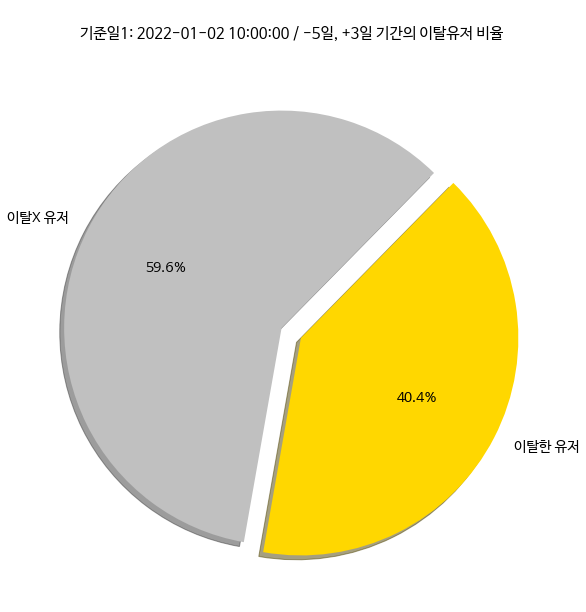

In [ ]:
data = train_df1['churn'].value_counts()
labels = ['이탈X 유저', '이탈한 유저']
explode = [0.05, 0.05,]
colors = ['silver', 'gold']

plt.figure(figsize=(10,10))
plt.pie(data, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors, textprops={'fontsize': 14})
plt.title('\n기준일1: 2022-01-02 10:00:00 / -5일, +3일 기간의 이탈유저 비율\n', size=15)

plt.show()

In [ ]:
target1_df['action'].value_counts()[:3]

PUT_gameinfo     2619157
POST_gameinfo     724889
POST_rank         562256
Name: action, dtype: int64

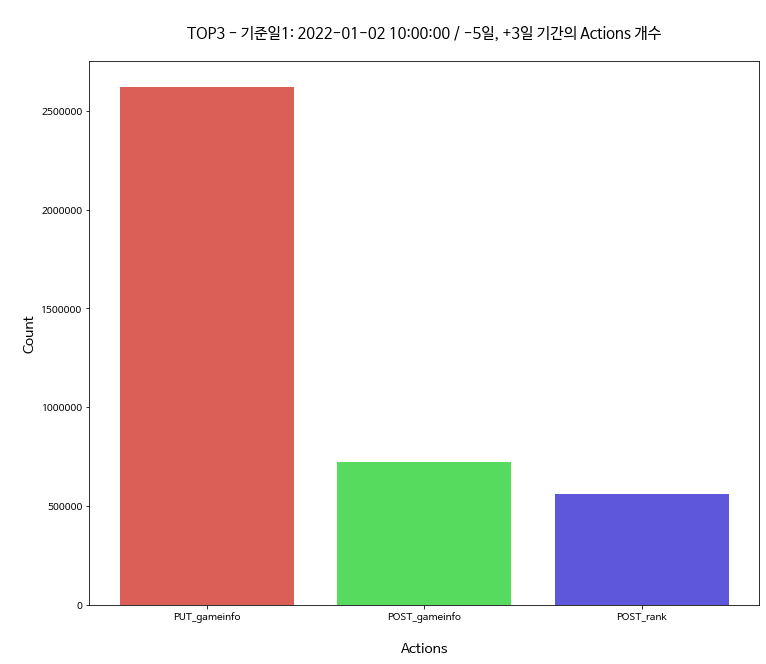

In [ ]:
A = target1_df['action'].value_counts()[:3]

x = np.arange(3)
colors = sns.color_palette('hls', len(A))

plt.figure(figsize=(12,10))
plt.bar(x,A.values, color=colors)
plt.xticks(x,A.index)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%i'))

plt.title('\nTOP3 - 기준일1: 2022-01-02 10:00:00 / -5일, +3일 기간의 Actions 개수\n', size=15)
plt.xlabel('\nActions', size=14)
plt.ylabel('\nCount', size=14)
plt.show()

In [ ]:
#train2
target2_df = target2_df.assign(churn=0)
target2_df.loc[target2_df['id'].isin(n2_churn), 'churn'] = 1
target2_df.churn.value_counts()

0    4737286
1     906948
Name: churn, dtype: int64

In [ ]:
train_df2.churn.value_counts()

0    44920
1    39299
Name: churn, dtype: int64

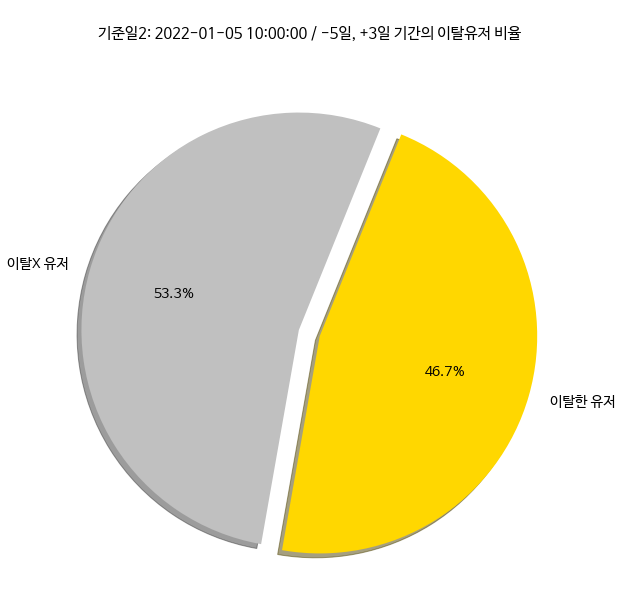

In [ ]:
data = train_df2['churn'].value_counts()
labels = ['이탈X 유저', '이탈한 유저']
explode = [0.05, 0.05,]
colors = ['silver', 'gold']

plt.figure(figsize=(10,10))
plt.pie(data, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors, textprops={'fontsize': 14})
plt.title('\n기준일2: 2022-01-05 10:00:00 / -5일, +3일 기간의 이탈유저 비율\n', size=15)
plt.show()

In [ ]:
target2_df['action'].value_counts()[:3]


PUT_gameinfo     2896047
POST_gameinfo     725821
POST_rank         535020
Name: action, dtype: int64

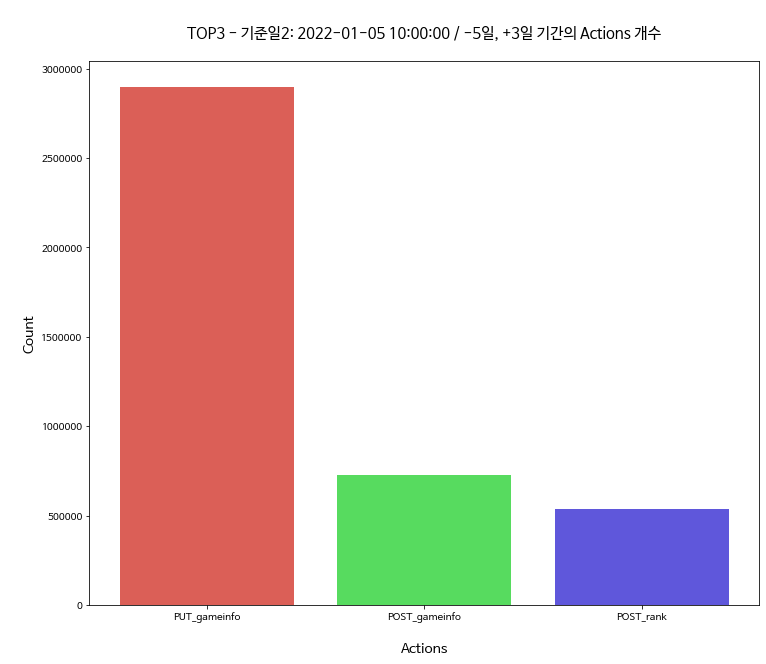

In [ ]:
A = target2_df['action'].value_counts()[:3]

x = np.arange(3)
colors = sns.color_palette('hls', len(A))

plt.figure(figsize=(12,10))
plt.bar(x,A.values, color=colors)
plt.xticks(x,A.index)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%i'))

plt.title('\nTOP3 - 기준일2: 2022-01-05 10:00:00 / -5일, +3일 기간의 Actions 개수\n', size=15)
plt.xlabel('\nActions', size=14)
plt.ylabel('\nCount', size=14)
plt.show()

In [ ]:
#train3
target3_df = target3_df.assign(churn=0)
target3_df.loc[target3_df['id'].isin(n3_churn), 'churn'] = 1
target3_df.churn.value_counts()

0    4646592
1     835564
Name: churn, dtype: int64

In [ ]:
train_df3.churn.value_counts()

0    48299
1    37668
Name: churn, dtype: int64

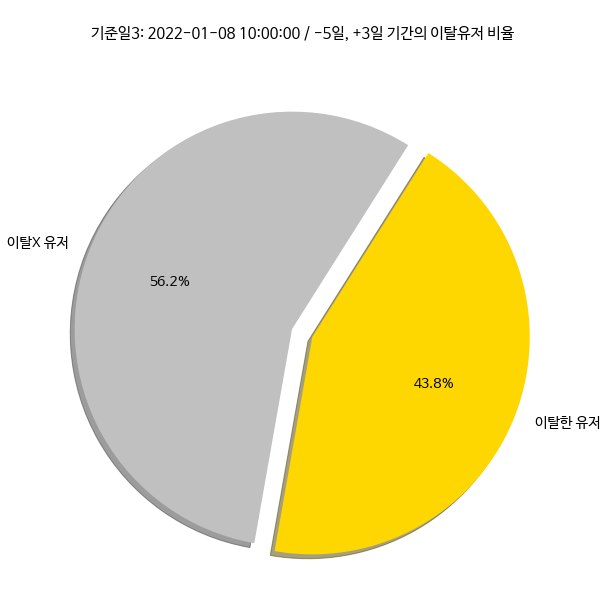

In [ ]:
data = train_df3['churn'].value_counts()
labels = ['이탈X 유저', '이탈한 유저']
explode = [0.05, 0.05,]
colors = ['silver', 'gold']

plt.figure(figsize=(10,10))
plt.pie(data, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors, textprops={'fontsize': 14})
plt.title('\n기준일3: 2022-01-08 10:00:00 / -5일, +3일 기간의 이탈유저 비율\n', size=15)

plt.show()

In [ ]:
target3_df['action'].value_counts()[:3]

PUT_gameinfo     2791111
POST_gameinfo     716420
POST_rank         505938
Name: action, dtype: int64

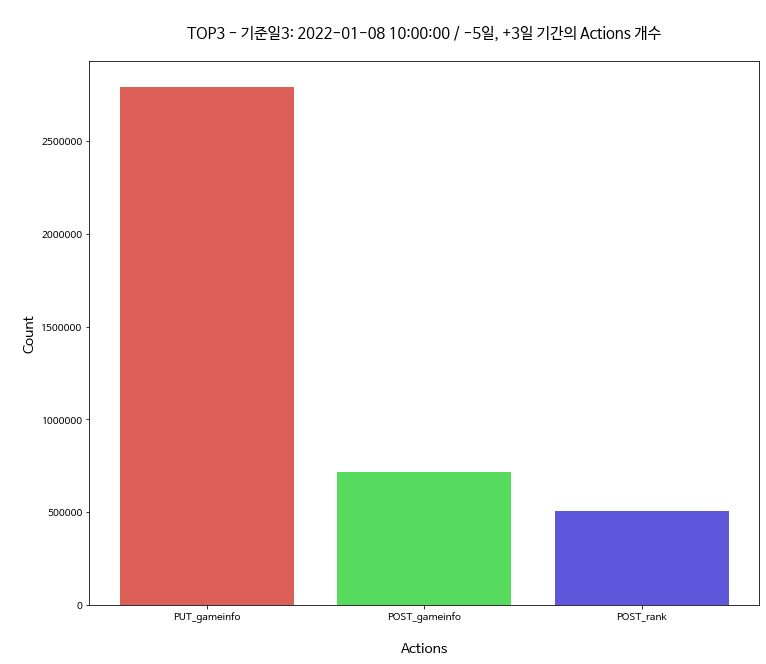

In [ ]:
A = target3_df['action'].value_counts()[:3]

x = np.arange(3)
colors = sns.color_palette('hls', len(A))

plt.figure(figsize=(12,10))
plt.bar(x,A.values, color=colors)
plt.xticks(x,A.index)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%i'))

plt.title('\nTOP3 - 기준일3: 2022-01-08 10:00:00 / -5일, +3일 기간의 Actions 개수\n', size=15)
plt.xlabel('\nActions', size=14)
plt.ylabel('\nCount', size=14)
plt.show()

## 임베딩 및 벡터화

In [ ]:
df['action'].value_counts()

PUT_gameinfo         4888848
POST_gameinfo        1324986
POST_rank             971758
GET_gameinfo          559431
GET_rank              493735
                      ...   
GET_authorization         11
POST_chat                  9
PUT_gamer                  5
POST_post                  1
DELETE_dbschema            1
Name: action, Length: 37, dtype: int64

In [ ]:
# df에 라벨링 함수
def assign_churn_df(df, i):
  n = 5
  m = 3
  df = df[(df['inDate'] >= target_list[i] - timedelta(days=n)) & (df['inDate'] <= target_list[i] + timedelta(days=m))]
  n_df = df[(df['inDate'] < target_list[i]) & (df['inDate'] >= target_list[i] - timedelta(days=n))]
  m_df = df[(df['inDate'] > target_list[i]) & (df['inDate'] <= target_list[i] + timedelta(days=m))]
  churn_users = set(df.id) - (set(n_df.id) & set(m_df.id))
  df = df.assign(churn=0) #churn column
  df.loc[df.id.isin(churn_users), 'churn'] = 1
  return df

In [ ]:
# df with churn
# 0 = 기준일 2022-01-02 10:00:00 : target_list[0]
# 1 = 기준일 2022-01-05 10:00:00 : target_list[1]
# 2 = 기준일 2022-01-08 10:00:00 : target_list[2]

df1 = assign_churn_df(df,0)
df2 = assign_churn_df(df,1)
df3 = assign_churn_df(df,2)

In [ ]:
df1

,inDate,id,action,churn
11216,2021-12-28 10:00:00.278,2319_55570a2f19b4125adad6d0664a170ed42edd3f458a84a3be035673c0986a5ec8,PUT_gameinfo,0
11217,2021-12-28 10:00:00.333,2319_0f9f322eb87fb97487e8deea2db2a7d1b47c551e7264824b07da4d5e9fd744c9,POST_gameinfo,0
11219,2021-12-28 10:00:00.375,1773_5fff6cb313872dc7deea7ec3d2205b1691cac8418c7cdfdee591366ea7b0dab9,POST_gameLog,0
11220,2021-12-28 10:00:00.377,1585_87920c0a061659cef63c5e8331a9efbd513ca3091d4b5c9e08d0ca169e7985aa,GET_isAliveToken,0
11221,2021-12-28 10:00:00.430,1773_c757fef5b3799921ddbe9a21711ad9ba1e42f31936a11019fc742bc6994e8ffa,GET_gamer,0
...,...,...,...,...
284831,2022-01-05 09:59:59.616,2097_7ce3343a62827cc791530c4c8d77188c7c53225b4b357f1da9ca24a21f8a0d98,GET_chat,0
284832,2022-01-05 09:59:59.700,2319_0836f967a396639cc7866790f9b0f2679c32745640ea131bf1a82e2159a40d68,POST_gameinfo,0
284833,2022-01-05 09:59:59.705,2319_c19482ac160266baa436a6df31aadb0079c45c5a8080b7ca5feed604be852797,POST_gameinfo,0
284834,2022-01-05 09:59:59.759,1913_6dd4c5eb92d047f7f9586fbdcdb18393624bf5ebedaef300da6a5afaaa11820a,PUT_gameinfo,1


In [ ]:
df1.shape, df2.shape, df3.shape

((5351114, 4), (5644234, 4), (5482156, 4))

In [ ]:
df1

,inDate,id,action,churn
11216,2021-12-28 10:00:00.278,2319_55570a2f19b4125adad6d0664a170ed42edd3f458a84a3be035673c0986a5ec8,PUT_gameinfo,0
11217,2021-12-28 10:00:00.333,2319_0f9f322eb87fb97487e8deea2db2a7d1b47c551e7264824b07da4d5e9fd744c9,POST_gameinfo,0
11219,2021-12-28 10:00:00.375,1773_5fff6cb313872dc7deea7ec3d2205b1691cac8418c7cdfdee591366ea7b0dab9,POST_gameLog,0
11220,2021-12-28 10:00:00.377,1585_87920c0a061659cef63c5e8331a9efbd513ca3091d4b5c9e08d0ca169e7985aa,GET_isAliveToken,0
11221,2021-12-28 10:00:00.430,1773_c757fef5b3799921ddbe9a21711ad9ba1e42f31936a11019fc742bc6994e8ffa,GET_gamer,0
...,...,...,...,...
284831,2022-01-05 09:59:59.616,2097_7ce3343a62827cc791530c4c8d77188c7c53225b4b357f1da9ca24a21f8a0d98,GET_chat,0
284832,2022-01-05 09:59:59.700,2319_0836f967a396639cc7866790f9b0f2679c32745640ea131bf1a82e2159a40d68,POST_gameinfo,0
284833,2022-01-05 09:59:59.705,2319_c19482ac160266baa436a6df31aadb0079c45c5a8080b7ca5feed604be852797,POST_gameinfo,0
284834,2022-01-05 09:59:59.759,1913_6dd4c5eb92d047f7f9586fbdcdb18393624bf5ebedaef300da6a5afaaa11820a,PUT_gameinfo,1


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'Correlation')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


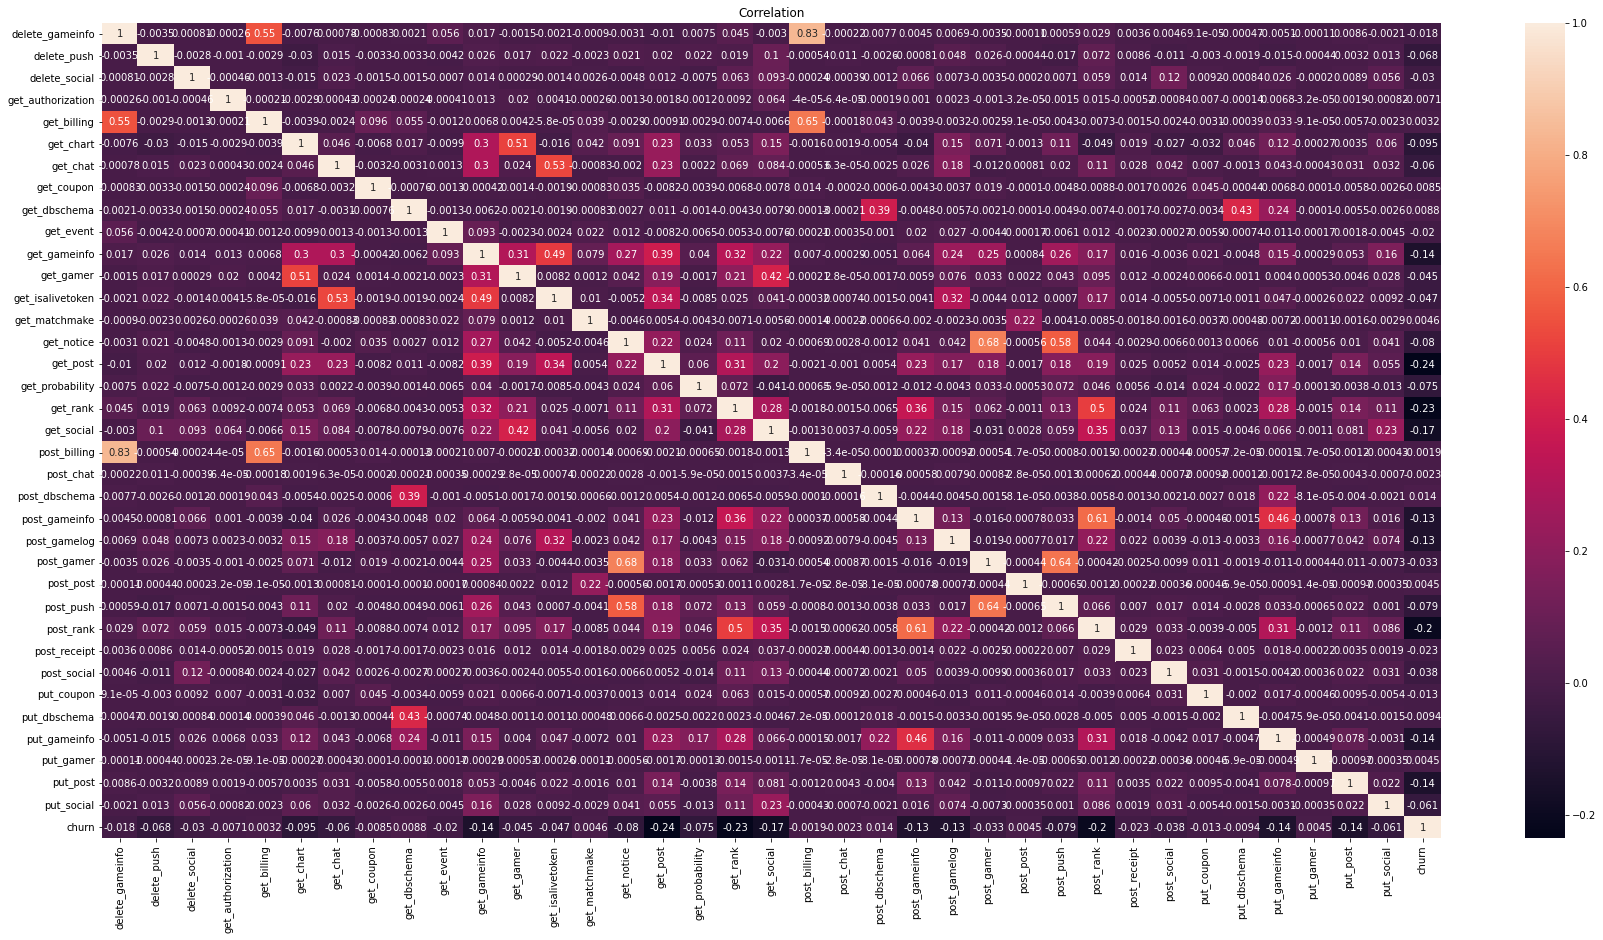

In [ ]:
# 상관관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
sns.heatmap(train_df1.corr(), annot=True)
plt.title("Correlation")

Text(0.5, 1.0, 'Correlation')

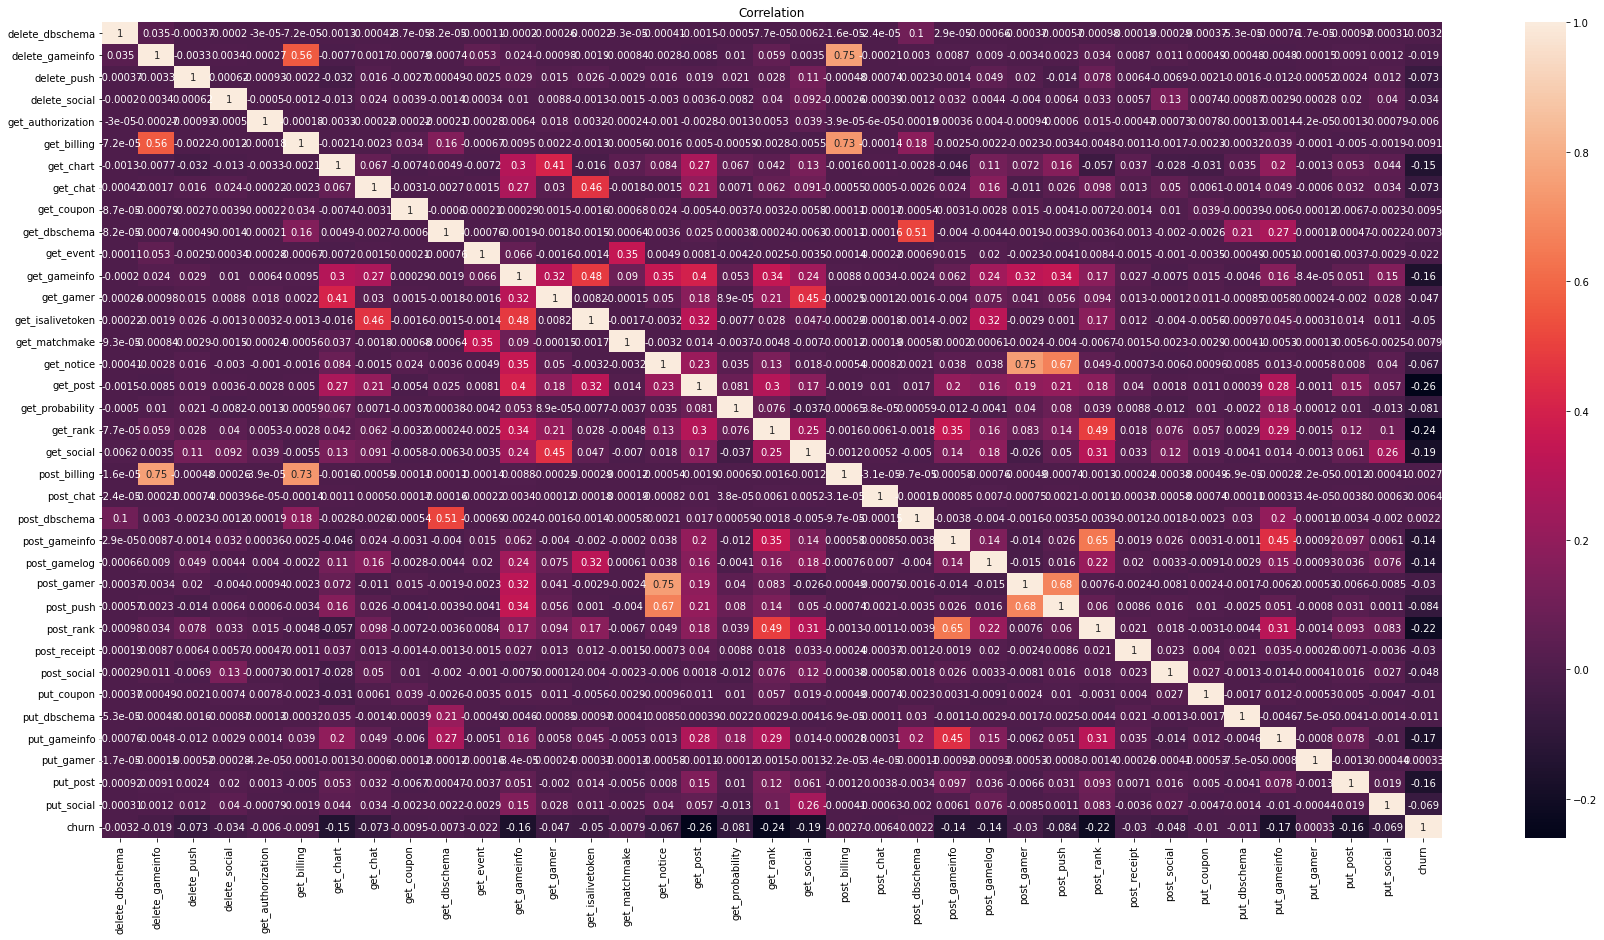

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(train_df2.corr(), annot=True)
plt.title("Correlation")

Text(0.5, 1.0, 'Correlation')

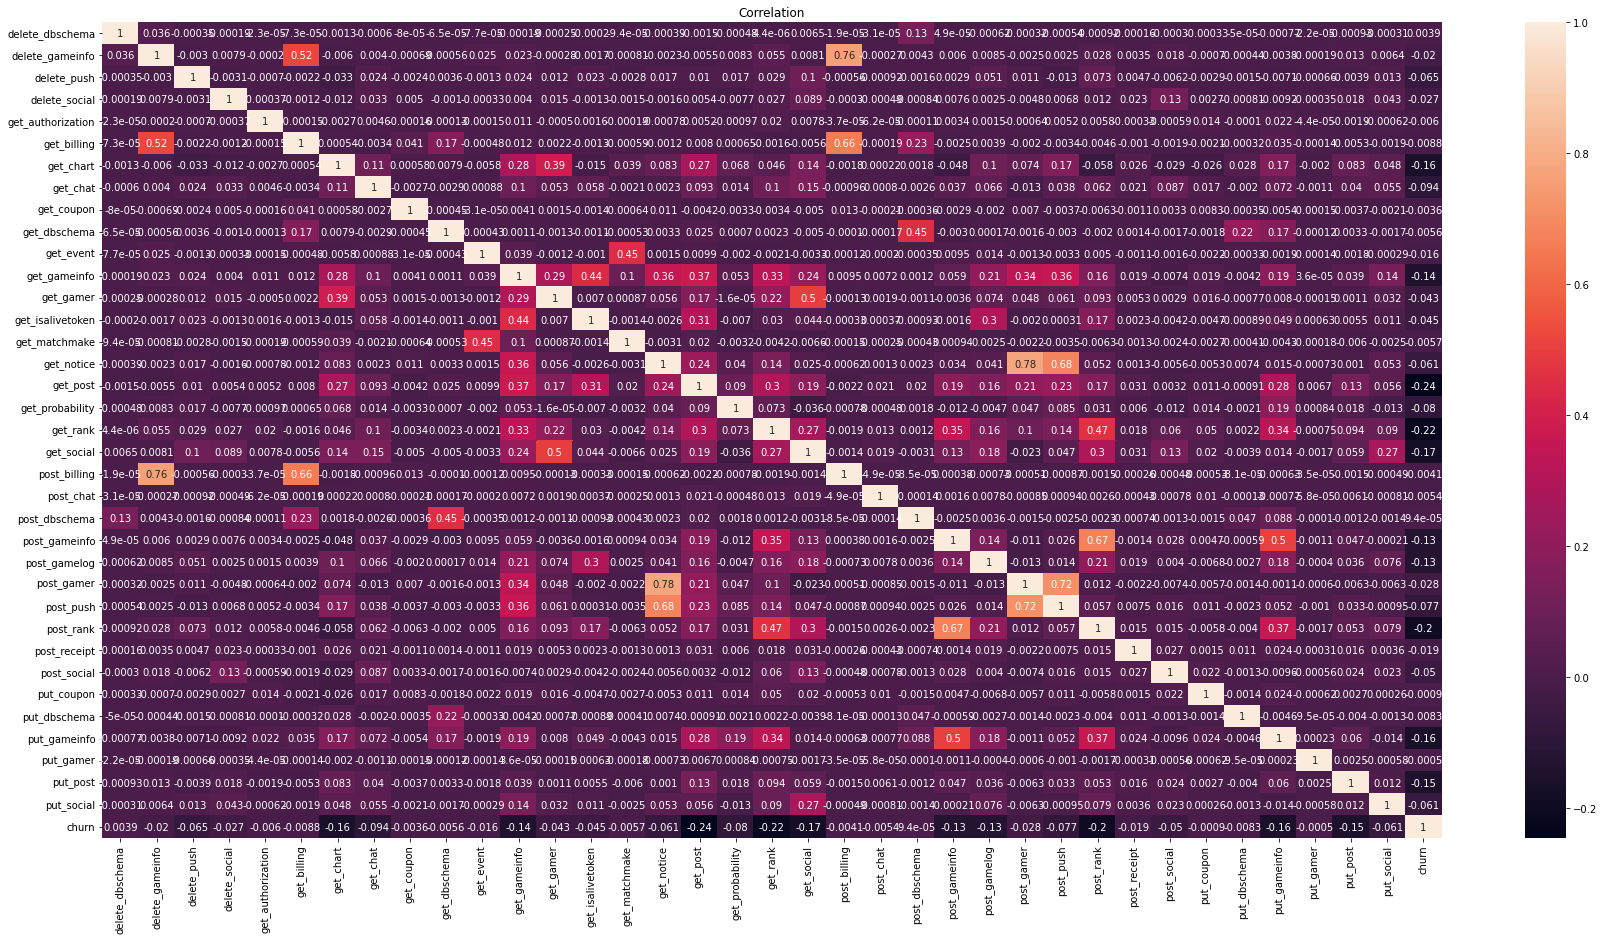

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(train_df3.corr(), annot=True)
plt.title("Correlation")

특정한 column에서 음의 관계를 확인했고, 1000개 빈도수가 아닌 columns drop

In [ ]:
#1000개 미만 빈도수의 action은 drop

counts = df['action'].value_counts() # value counts

df1 = df1[~df1['action'].isin(counts[counts < 1000].index)]
df2 = df2[~df2['action'].isin(counts[counts < 1000].index)]
df3 = df3[~df3['action'].isin(counts[counts < 1000].index)]

In [ ]:
df1.shape, df2.shape, df3.shape

((5349638, 4), (5642765, 4), (5480876, 4))

In [ ]:
#data의 ID당 action을 나타내는 preprocessing 함수

def preprocessing_df(df):
  groupby_ID = df.groupby("id")
  ID_action_list =[]
  for key, value in groupby_ID: # 각 id당 inDate와 action을 나타냄
    ID_action_dictionary = {}
    ID_action_dictionary["id"] = key
    ID_action_dictionary["action"] = value["action"].to_list() #action의 value값을 리스트로 적용
    ID_action_list.append(ID_action_dictionary)
  return pd.DataFrame(ID_action_list)

In [ ]:
# 유저별 action 합친 후 데이터프레임 without churn

count_df1 = preprocessing_df(df1)
count_df2 = preprocessing_df(df2)
count_df3 = preprocessing_df(df3) 

In [ ]:
count_df2

,id,action
0,1010_084e1eb5ace72cb2e36a1b401577db14d774f3b2558d573d5c7b41e59d09577d,"[PUT_gameinfo, GET_gameinfo, POST_rank, GET_gameinfo, GET_gameinfo, GET_gameinfo, GET_gameinfo, GET_gameinfo, POST_rank]"
1,1010_162b8f1ad4ddcf87170ae5afbf7debda99e9a5b9d2ee10995c1e5f65c5b94121,"[POST_gameinfo, GET_gameinfo, GET_gameinfo, POST_rank, GET_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank]"
2,1010_1934af52c603ece0bf5850c4a857559fe189950a0b228ad68a4082261580fa55,"[GET_gameinfo, PUT_gameinfo]"
3,1010_243e76031e9d734ffa9a63a30efbe2d3afbd712478f80eb5f7bf3f0f570687bc,"[POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank, POST_rank]"
4,1010_2c7b14f41e880af1d933e8d309f631c43bb7e7335521820aa3f300c253bf8e67,"[GET_gameinfo, POST_rank, POST_rank, GET_gameinfo, GET_gameinfo, GET_rank, POST_rank, GET_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_gameinfo, GET_gameinfo, PUT_gameinfo, GET_rank, GET_gameinfo, POST_rank, GET_gameinfo, POST_rank, POST_rank, GET_gameinfo, GET_gameinfo, GET_gameinfo, GET_gameinfo]"
...,...,...
84214,953_ff4aaca260001c1ed5327f0251417c927ecff41e9e448b57be271d9d81e13d86,"[PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_gameinfo, GET_rank, PUT_gameinfo, POST_gameLog, GET_rank, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_isAliveToken, GET_rank, PUT_gameinfo, GET_isAliveToken, GET_rank, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_post, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_isAliveToken, GET_gameinfo, GET_gameinfo, GET_gameinf..."
84215,953_ff813e66d21d17d28f00a9e7477553f2fd9c4bbc48a2940dbe52c02977bc6866,"[GET_gameinfo, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_rank, PUT_gameinfo, POST_gameLog, GET_gameinfo, PUT_gameinfo, POST_gameLog, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_rank, PUT_gameinfo, PUT_gameinfo, GET_rank, POST_gameinfo, POST_gameinfo, PUT_gameinfo, PUT_gameinfo, POST_gameLog, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_rank, PUT_gameinfo, GET..."
84216,953_ff9910dae6b367a08db786ad226443486820c78a667db36c5b44473f9a143042,"[GET_gameinfo, GET_rank, GET_rank, PUT_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_gameinfo, PUT_gameinfo, PUT_gameinfo, POST_gameLog, PUT_gameinfo, GET_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_rank]"
84217,953_ff9a87180c4712cb0b237bdf6360feafa8e518cff31e57c25a1e874ae21bfbeb,"[GET_rank, GET_rank, PUT_gameinfo, GET_rank, POST_gameinfo, PUT_gameinfo, PUT_gameinfo, GET_gameinfo, POST_gameLog]"


In [ ]:
# 유저별 actions를 빈도수로 count vectorize 하는 함수 

from sklearn.feature_extraction.text import CountVectorizer

def user_vectorize(df):
  vector = CountVectorizer()
  corpus = df["action"].apply(lambda x : " ".join(x))
  count_df = pd.DataFrame(vector.fit_transform(corpus).toarray(),
                          columns=vector.get_feature_names_out(),
                          index = df['id']
                          )
  return count_df


In [ ]:
 # 유저별 합친 데이터에 churn 라벨링 함수
 # vector화 후 target_df[i] 넣으면 사용 가능

def assign_churn_train(df,id):
  df = df.assign(churn=0) #churn column
  df.loc[df.index.isin(id), 'churn'] = 1
  return df

In [ ]:
# 라벨링된 df의 churn user id 리스트 저장 함수
def list_churn_id(df):
  churn_users = list(df['id'].loc[df['churn'] == 1])
  return churn_users

In [ ]:
# tf-idf 데이터프레임 without churn 
vector_count_df1 = user_vectorize(count_df1)
vector_count_df2 = user_vectorize(count_df2)
vector_count_df3 = user_vectorize(count_df3)

In [ ]:
# tf-idf 데이터프레임에 churn 라벨링
train_df1 = assign_churn_train(vector_count_df1,list_churn_id(df1))
train_df2 = assign_churn_train(vector_count_df2,list_churn_id(df2))
train_df3 = assign_churn_train(vector_count_df3,list_churn_id(df3))

Text(0.5, 1.0, 'Correlation')

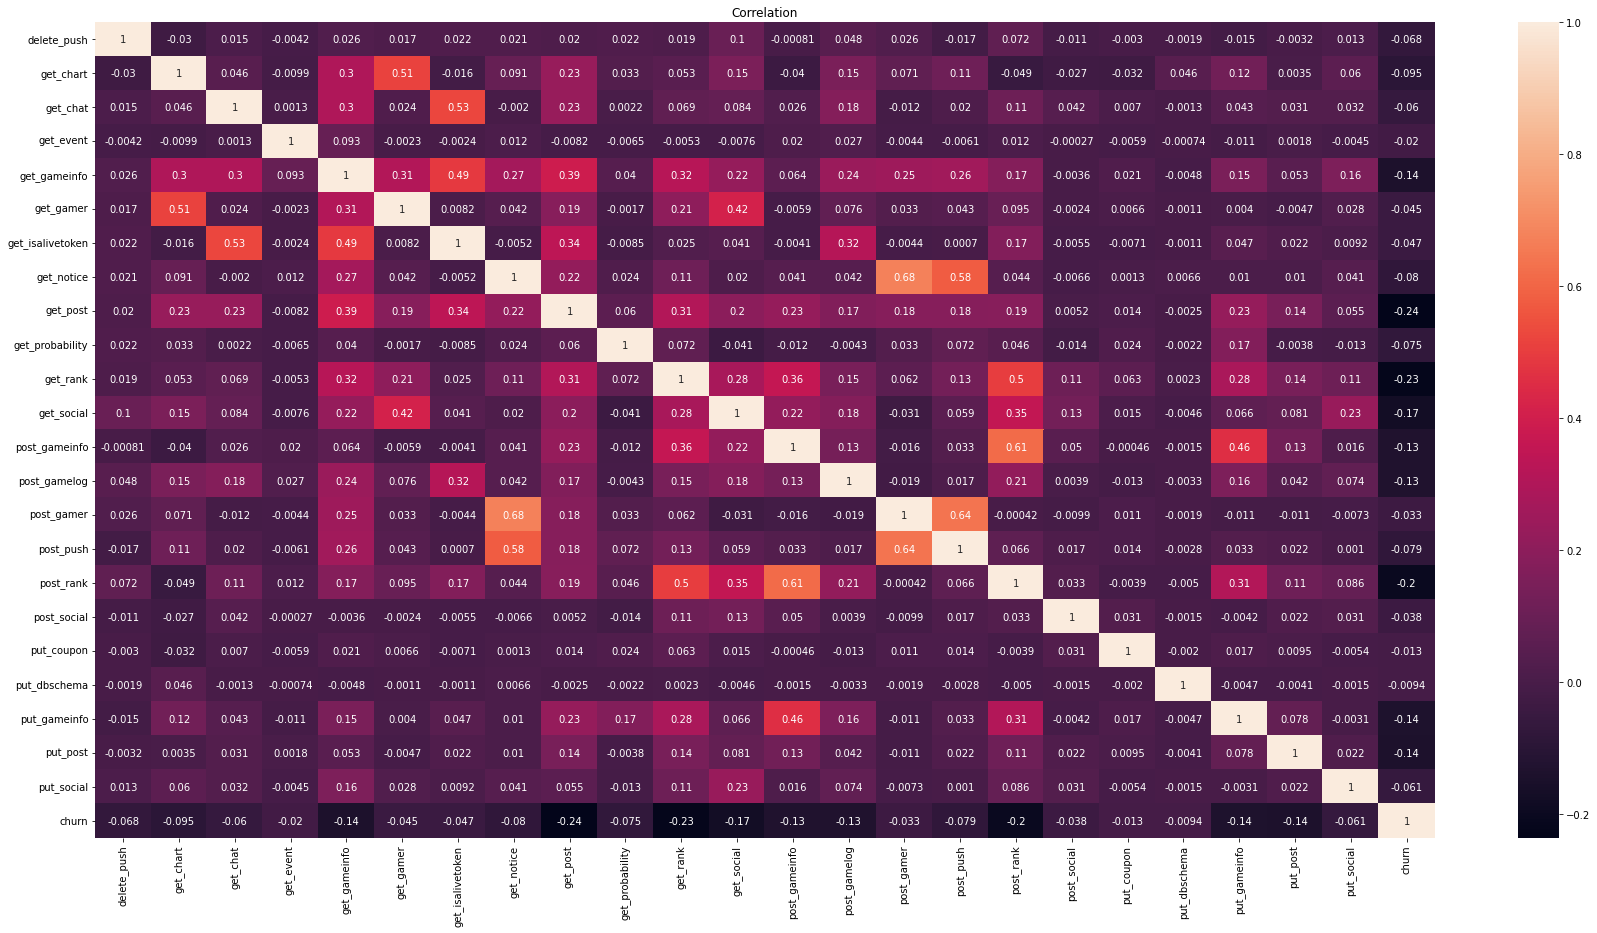

In [ ]:
# 1000개 빈도수 이상인 columns 상관관계 분석
plt.figure(figsize=(30,15))
sns.heatmap(train_df1.corr(), annot=True)
plt.title("Correlation")

Text(0.5, 1.0, 'Correlation')

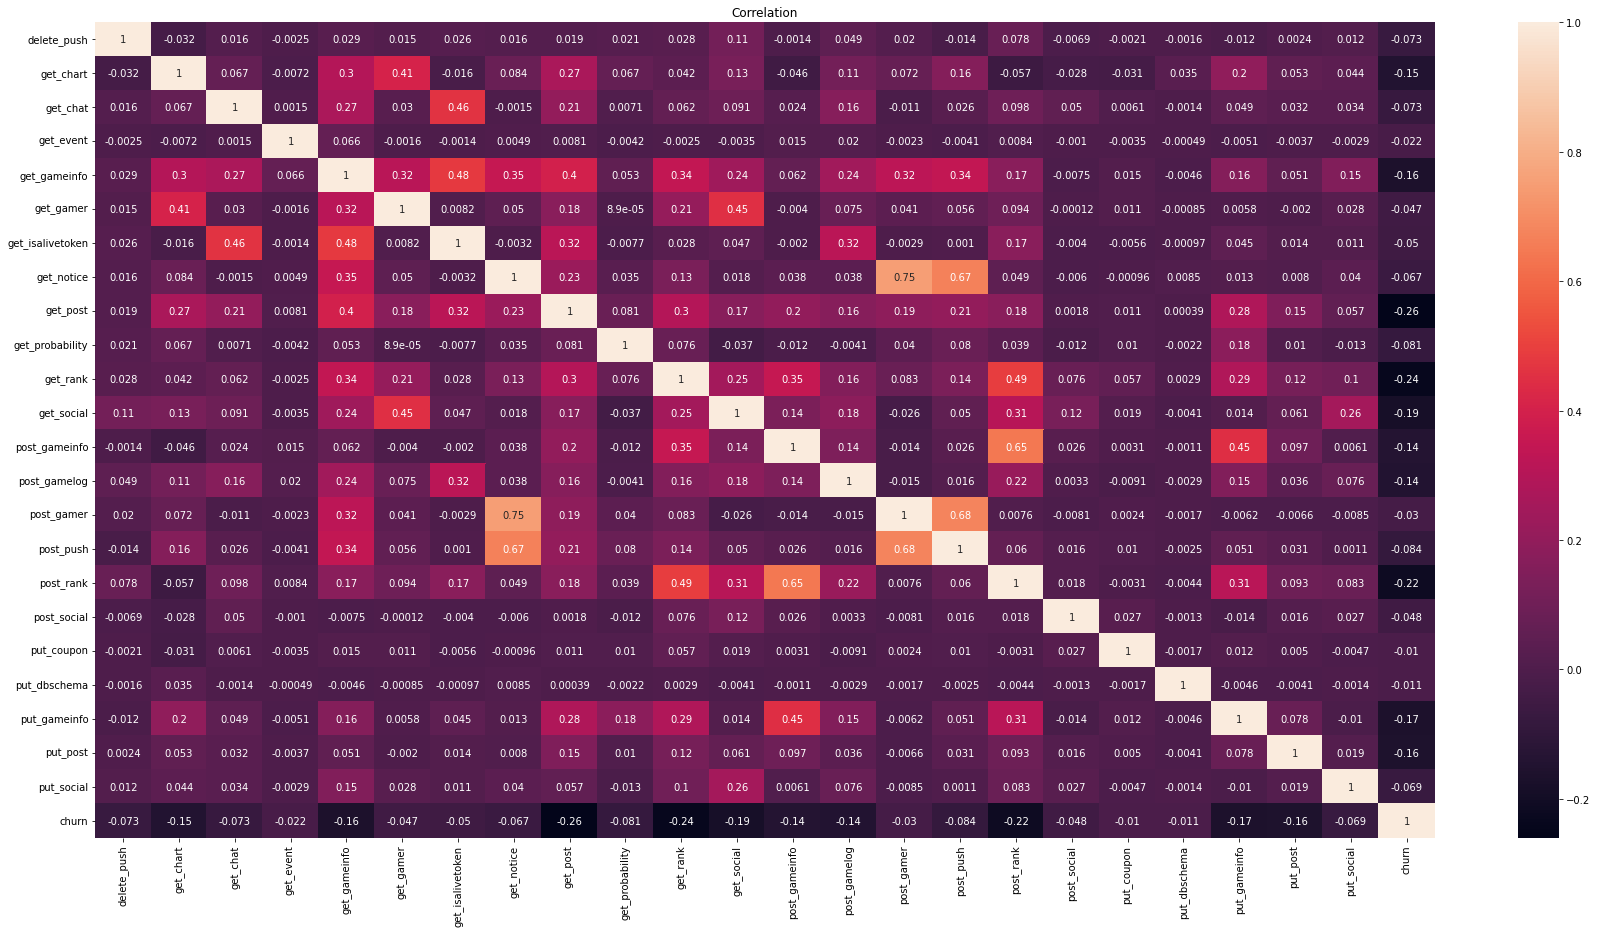

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(train_df2.corr(), annot=True)
plt.title("Correlation")

Text(0.5, 1.0, 'Correlation')

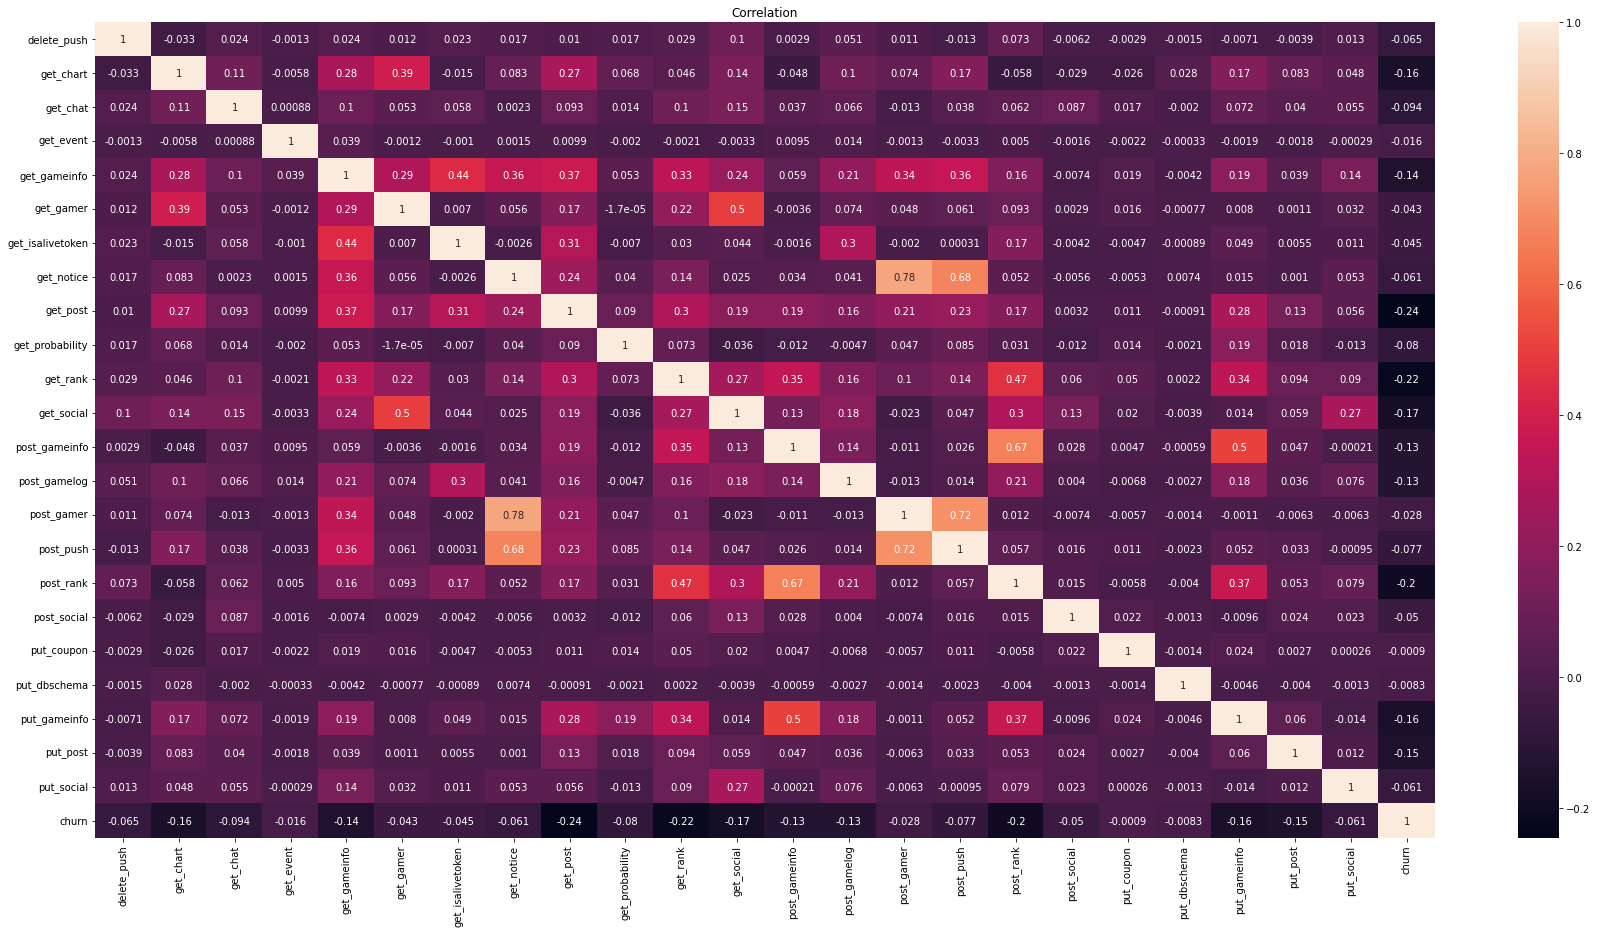

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(train_df3.corr(), annot=True)
plt.title("Correlation")

결론: 예측 결과를 위해선 3가지 heatmap을 봤을때 공통되게 관계가 많이 없어보이는 Columnse들을 drop 하기로 판단 

In [ ]:
train_df1.columns

Index(['delete_push', 'get_chart', 'get_chat', 'get_event', 'get_gameinfo',
       'get_gamer', 'get_isalivetoken', 'get_notice', 'get_post',
       'get_probability', 'get_rank', 'get_social', 'post_gameinfo',
       'post_gamelog', 'post_gamer', 'post_push', 'post_rank', 'post_social',
       'put_coupon', 'put_dbschema', 'put_gameinfo', 'put_post', 'put_social',
       'churn'],
      dtype='object')

In [ ]:
len(train_df1.columns)

24

In [ ]:
train_df1 = train_df1.drop(['get_chat','get_event', 'get_gamer', 'get_isalivetoken', 'post_gamer', 'post_social', 'put_coupon'], axis=1)
train_df2 = train_df2.drop(['get_chat','get_event', 'get_gamer', 'get_isalivetoken', 'post_gamer', 'post_social', 'put_coupon'], axis=1)
train_df3 = train_df3.drop(['get_chat','get_event', 'get_gamer', 'get_isalivetoken', 'post_gamer', 'post_social', 'put_coupon'], axis=1)

In [ ]:
len(train_df1.columns)

17

In [ ]:
train_df1.shape

(72662, 17)

In [ ]:
train_df2.shape

(84219, 17)

In [ ]:
train_df3.shape

(85967, 17)

In [ ]:
train_df1.to_csv('기준일1_df.csv')

In [ ]:
train_df2.to_csv('기준일2_df.csv')

In [ ]:
train_df3.to_csv('기준일3_df.csv')

## 모델 - XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# 기준일1 기준 데이터 -  2021-12-28 10:00:00.278 ~ 2022-01-05 09:59:59.798

y_train_1 = train_df1.loc[:,'churn']
X_train_1 = train_df1.drop('churn', axis=1)

In [ ]:
# 기준일2 기준 데이터 -  2021-12-31 10:00:00.258 ~ 2022-01-08 09:59:59.760

y_train_2 = train_df2.loc[:,'churn']
X_train_2 = train_df2.drop('churn', axis=1)

In [ ]:
# 기준일3 기준 데이터 -  2022-01-03 10:00:00.154 ~ 2022-01-11 09:59:59.841

y_train_3 = train_df3.loc[:,'churn']
X_train_3 = train_df3.drop('churn', axis=1)

#### 기준일 1 학습, 기준일 2 예측

In [ ]:
model = XGBClassifier()

xgb_parameters = {
 'min_child_weight': [0.5, 1, 3, 5, 8],
 'gamma': [0.2, 0.5, 1, 2],
 'subsample': [0.4, 0.6, 0.8, 1.0],
 'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
 'max_depth': [4, 6, 8, 10],
 'objective': ['binary:logistic'],
}

cv = KFold(n_splits=6)

rsv = RandomizedSearchCV(model, xgb_parameters, cv=cv, scoring='roc_auc', n_jobs=6, verbose=10)
rsv.fit(X_train_1.values,y_train_1.values)

print('final params', rsv.best_params_)
print('best score', rsv.best_score_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
final params {'subsample': 0.6, 'objective': 'binary:logistic', 'min_child_weight': 5, 'max_depth': 8, 'gamma': 0.2, 'colsample_bytree': 0.4}
best score 0.7864782233270509


In [ ]:
model = XGBClassifier()

xgb_parameters = {
 'min_child_weight': [0.5, 1, 3, 5, 8],
 'gamma': [0.2, 0.5, 1, 2],
 'subsample': [0.4, 0.6, 0.8, 1.0],
 'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
 'max_depth': [4, 6, 8, 10],
 'objective': ['binary:logistic'],
}

cv = KFold(n_splits=6)

rsv = RandomizedSearchCV(model, xgb_parameters, cv=cv, scoring='roc_auc', n_jobs=6, verbose=10)
rsv.fit(X_train_1.values,y_train_1.values)
estimator = rsv.best_estimator_

print('final params', rsv.best_params_)
print('best score', rsv.best_score_)

In [ ]:
# 파라미터 튜닝후 기준일 1 학습
estimator.fit(X_train_1,y_train_1)

XGBClassifier(colsample_bytree=0.2, gamma=2, max_depth=6, min_child_weight=0.5,
              subsample=0.6)

In [ ]:
# 파라미터 튜닝후 기준일 2 예측
y_pred_1 = estimator.predict(X_train_2)
roc_score = roc_auc_score(y_train_2, y_pred_1)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.7434


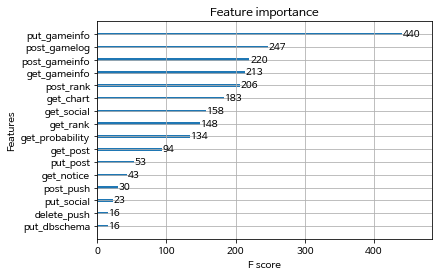

In [ ]:
xgboost.plot_importance(estimator)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


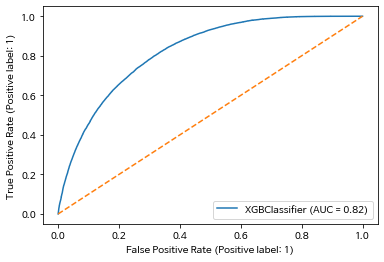

In [ ]:
plot_roc_curve(estimator, X_train_1, y_train_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train_2, y_pred_1)

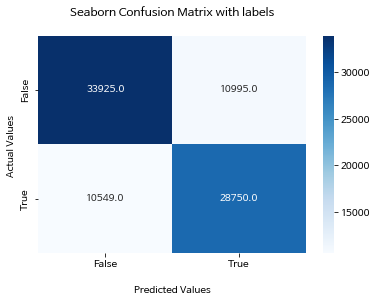

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### 기준일 2 학습, 기준일 3 예측

In [ ]:
# 파라미터 튜닝후 기준일 2 학습
estimator.fit(X_train_2,y_train_2)

XGBClassifier(colsample_bytree=0.2, gamma=2, max_depth=6, min_child_weight=0.5,
              subsample=0.6)

In [ ]:
# 파라미터 튜닝후 기준일 3 예측
y_pred_2 = estimator.predict(X_train_3)
roc_score = roc_auc_score(y_train_3, y_pred_2)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.7363


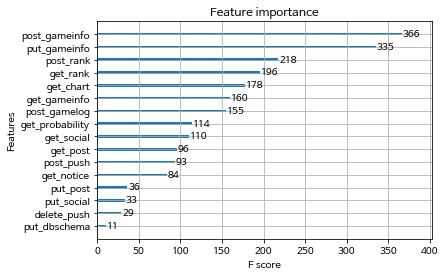

In [ ]:
xgboost.plot_importance(estimator)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


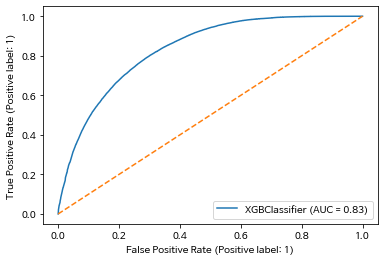

In [ ]:
plot_roc_curve(estimator, X_train_2, y_train_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train_3, y_pred_2)

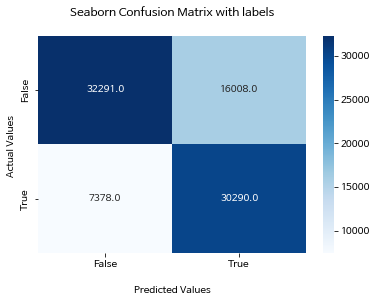

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### 기준일1+ 기준일2 학습 후 기준일3 예측

In [ ]:
X_train_1_2 = pd.concat([X_train_1,X_train_2])
y_train_1_2 = pd.concat([y_train_1,y_train_2])

In [ ]:
# 파라미터 튜닝후 기준일 1+2 학습
estimator.fit(X_train_1_2,y_train_1_2)

XGBClassifier(colsample_bytree=0.2, gamma=2, max_depth=6, min_child_weight=0.5,
              subsample=0.6)

In [ ]:
# 파라미터 튜닝후 기준일 3 예측
y_pred_3 = estimator.predict(X_train_3)
roc_score = roc_auc_score(y_train_3, y_pred_3)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.7369


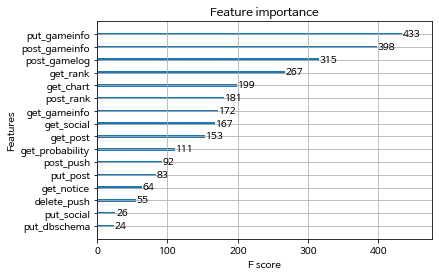

In [ ]:
xgboost.plot_importance(estimator)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


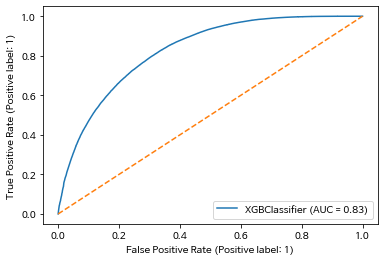

In [ ]:
plot_roc_curve(estimator, X_train_1_2, y_train_1_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train_3, y_pred_3)

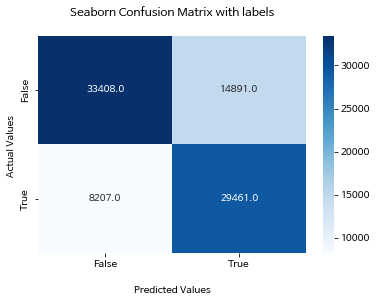

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### SMOTE 오버샘플링 적용

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_1_smote,y_train_1_smote = smote.fit_resample(X_train_1,y_train_1)
X_train_2_smote,y_train_2_smote = smote.fit_resample(X_train_2,y_train_2)
X_train_3_smote,y_train_3_smote = smote.fit_resample(X_train_3,y_train_3)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_1.shape, y_train_1.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_1_smote.shape, y_train_1_smote.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_1_smote).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (72662, 16) (72662,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (86596, 16) (86596,)
SMOTE 적용 후 레이블 값 분포: 
 0    43298
1    43298
Name: churn, dtype: int64


In [ ]:
# SMOTE 오버 샘플링 / 파라미터 튜닝 후 기준일 1 학습
estimator.fit(X_train_1_smote,y_train_1_smote)

XGBClassifier(colsample_bytree=0.4, gamma=0.2, max_depth=8, min_child_weight=5,
              subsample=0.6)

In [ ]:
# SMOTE 오버 샘플링 / 파라미터 튜닝 후  기준일 2 예측
y_pred_1 = estimator.predict(X_train_2)
roc_score = roc_auc_score(y_train_2, y_pred_1)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.7544


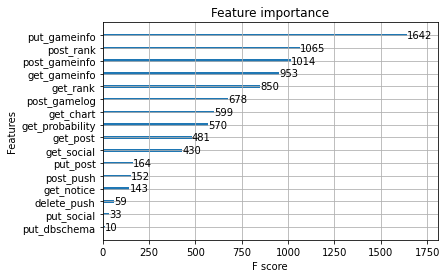

In [ ]:
xgboost.plot_importance(estimator)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


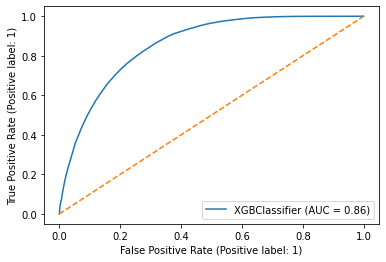

In [ ]:
plot_roc_curve(estimator, X_train_1_smote, y_train_1_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train_2, y_pred_1)

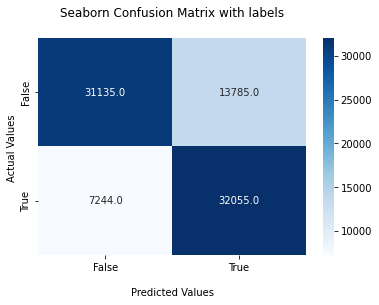

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()